# **Trabalho Prático: Previsão de Incidentes Rodoviários**

## Descrição do Problema

## Preparação do programa

### Bibliotecas e Funções

In [2]:
import sklearn as skl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid

#Modelos a usar
from sklearn.linear_model import LogisticRegression
from sklearn.tree         import DecisionTreeClassifier
from sklearn.tree         import DecisionTreeRegressor
from sklearn.svm          import SVC

#Métricas de qualidade
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import make_scorer

from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import MinMaxScaler

from livelossplot import PlotLossesKerasTF

### Leitura dos datasets

In [3]:
dftrain = pd.read_csv('training_data.csv')
dftest = pd.read_csv('test_data.csv')

## Exploração dos dados

Para esta etapa do trabalho, também se utilizou as informações obtidas no website "kaggle", tais como:
* Tipos dos atributos
* Conteúdo dos atributos
* Missing values

### Visualização dos dados

In [182]:
dftrain.shape

(5000, 13)

In [183]:
dftrain.head()

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,None
1,Guimaraes,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,None
2,Guimaraes,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High


In [184]:
dftrain.tail()

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
4995,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-04-13 00:00,DARK,13.0,1021.0,56.0,0.0,0.0,Sem Chuva,High
4996,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-07-06 14:00,LIGHT,19.0,1017.0,68.0,0.0,0.0,Sem Chuva,None
4997,Guimaraes,UNDEFINED,0,",",2021-03-18 03:00,DARK,13.0,1023.0,47.0,2.0,0.0,Sem Chuva,None
4998,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-11-02 06:00,DARK,12.0,1014.0,93.0,2.0,0.0,Sem Chuva,None
4999,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-12-20 02:00,DARK,12.0,1018.0,77.0,3.0,0.0,Sem Chuva,None


### Informações sobre os diferentes atributos

In [185]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   affected_roads      4915 non-null   object 
 4   record_date         5000 non-null   object 
 5   luminosity          5000 non-null   object 
 6   avg_temperature     5000 non-null   float64
 7   avg_atm_pressure    5000 non-null   float64
 8   avg_humidity        5000 non-null   float64
 9   avg_wind_speed      5000 non-null   float64
 10  avg_precipitation   5000 non-null   float64
 11  avg_rain            5000 non-null   object 
 12  incidents           5000 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 507.9+ KB


In [186]:
dftrain.describe()

,delay_in_seconds,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0
mean,560.567000,14.583000,1018.145000,74.455000,1.253500,0.0
std,1686.859581,4.820514,5.174372,17.204638,1.269847,0.0
min,0.000000,1.000000,997.000000,6.000000,0.000000,0.0
25%,0.000000,11.000000,1015.000000,63.000000,0.000000,0.0
50%,0.000000,14.000000,1019.000000,78.000000,1.000000,0.0
75%,234.000000,18.000000,1022.000000,90.000000,2.000000,0.0
max,31083.000000,35.000000,1032.000000,100.000000,10.000000,0.0


### Missing Values

In [187]:
dftrain.isna().any()

city_name             False
magnitude_of_delay    False
delay_in_seconds      False
affected_roads         True
record_date           False
luminosity            False
avg_temperature       False
avg_atm_pressure      False
avg_humidity          False
avg_wind_speed        False
avg_precipitation     False
avg_rain              False
incidents             False
dtype: bool

In [188]:
dftrain.isna().sum()

city_name              0
magnitude_of_delay     0
delay_in_seconds       0
affected_roads        85
record_date            0
luminosity             0
avg_temperature        0
avg_atm_pressure       0
avg_humidity           0
avg_wind_speed         0
avg_precipitation      0
avg_rain               0
incidents              0
dtype: int64

### Matriz de Correlação

<AxesSubplot:>

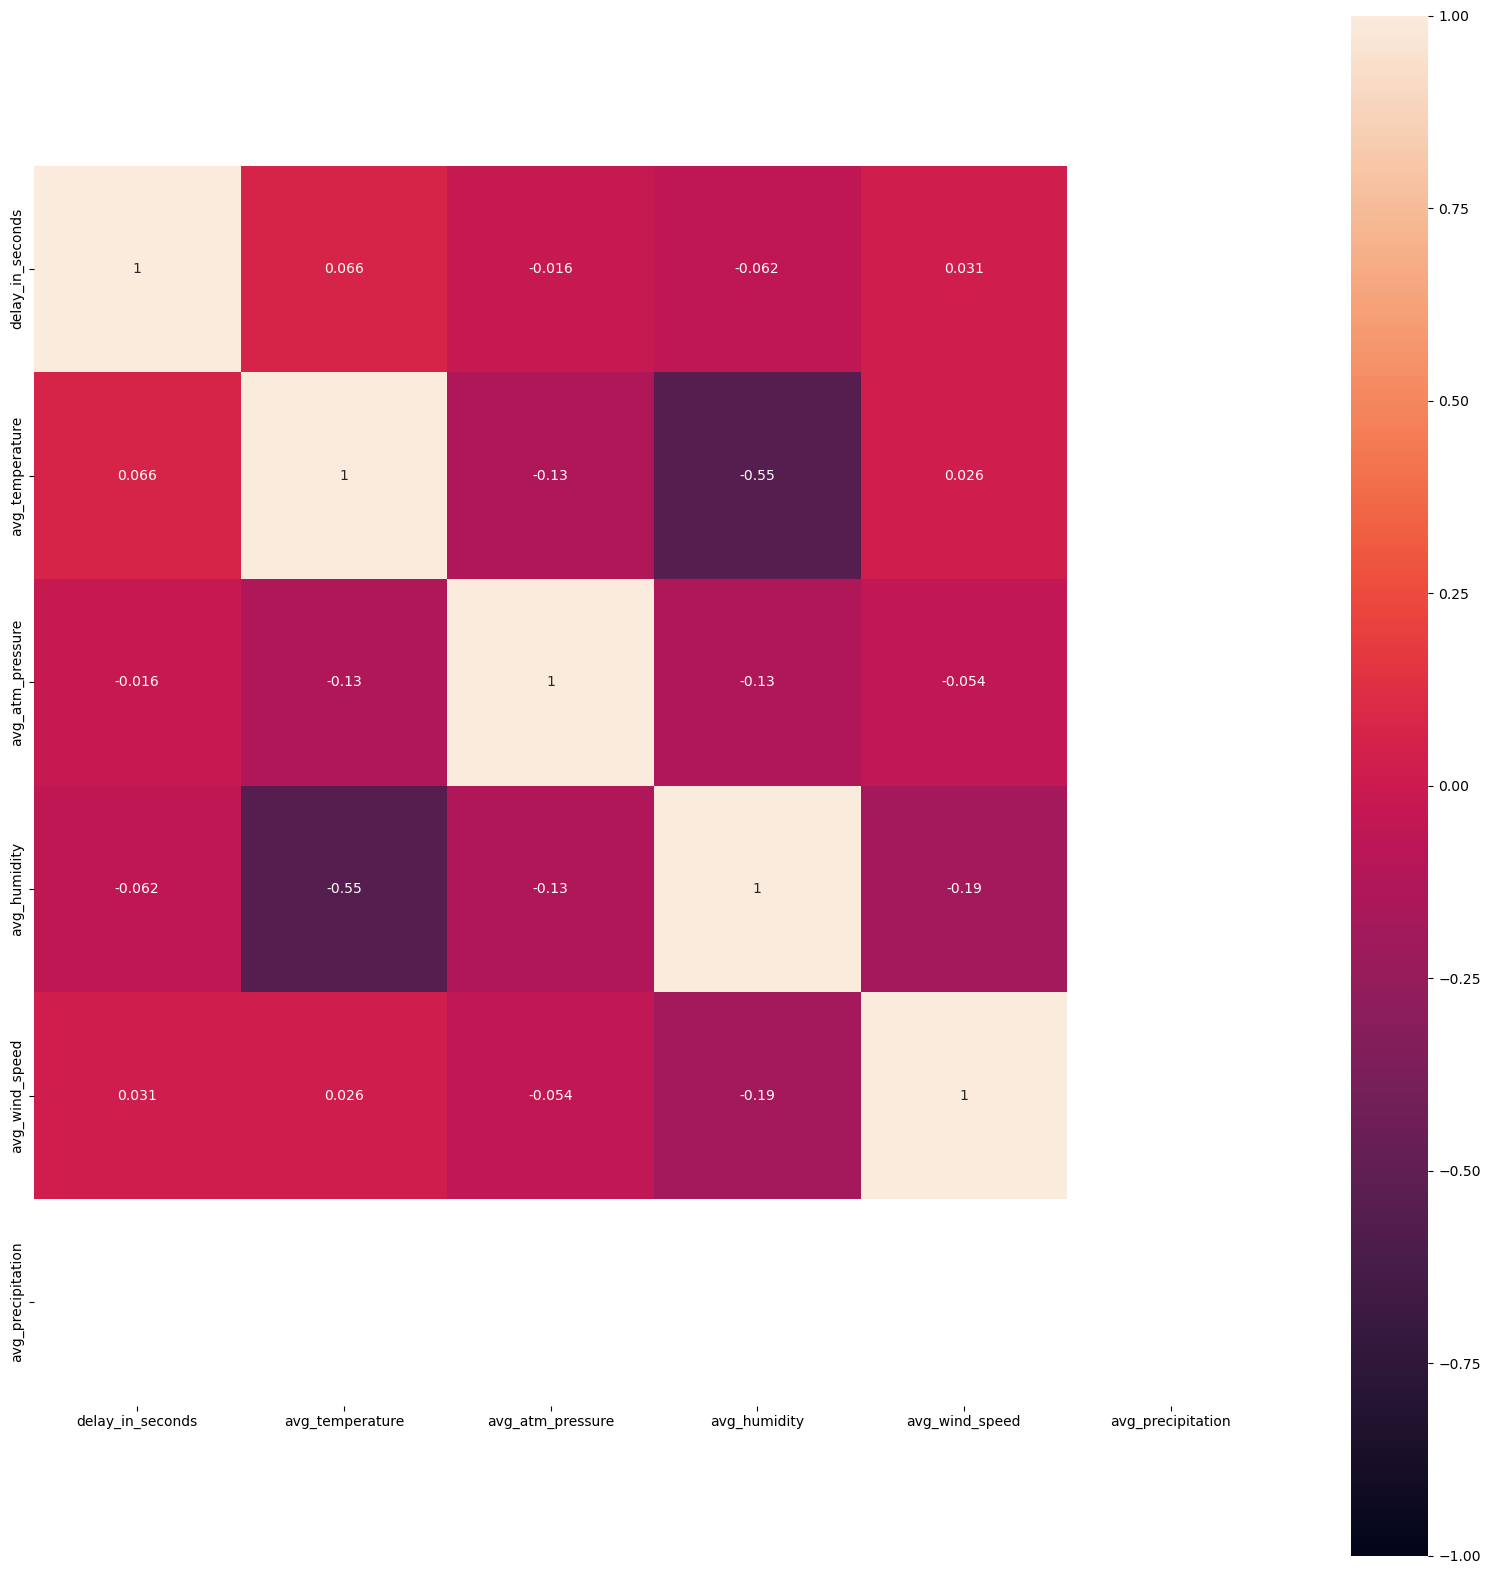

In [189]:
corr_matrix = dftrain.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

### Pairplot

### Histogramas

## Preparação dos dados

### Apagar atributos

In [4]:
# Era sempre Guimarães em todos os registos, logo não tem impacto nenhum
dftrain = dftrain.drop(["city_name"], axis=1)
dftest = dftest.drop(["city_name"], axis=1)

# Era sempre 0 em todos os registos, logo não tem impacto nenhum
dftrain = dftrain.drop(["avg_precipitation"], axis=1)
dftest = dftest.drop(["avg_precipitation"], axis=1)

# Era sempre 0 em todos os registos, logo não tem impacto nenhum
#dftrain = dftrain.drop(["delay_in_seconds"], axis=1)
#dftest = dftest.drop(["delay_in_seconds"], axis=1)

### Alteração do tipo dos atributos

#### Label Encoding

In [5]:
label_encoder = preprocessing.LabelEncoder()

#Train
dftrain['magnitude_of_delay']= label_encoder.fit_transform(dftrain['magnitude_of_delay'])
dftrain['luminosity']= label_encoder.fit_transform(dftrain['luminosity'])
dftrain['avg_rain']= label_encoder.fit_transform(dftrain['avg_rain'])
#dftrain['incidents']= label_encoder.fit_transform(dftrain['incidents'])

#Test
dftest['magnitude_of_delay']= label_encoder.fit_transform(dftest['magnitude_of_delay'])
dftest['luminosity']        = label_encoder.fit_transform(dftest['luminosity'])
dftest['avg_rain']          = label_encoder.fit_transform(dftest['avg_rain'])

#### Atributo affected_roads

##### Quantidade de vezes que estradas aparecem

In [6]:
dftrain['affected_roads']  = dftrain['affected_roads'].apply(lambda x: 0 if pd.isnull(x) else len(list(filter(None, x.split(',')))))
dftest['affected_roads']   = dftest['affected_roads'].apply(lambda x: 0 if pd.isnull(x) else len(list(filter(None, x.split(',')))))

##### Quantidade de vezes que cada tipo de estrada aparece

#### String to Date

In [7]:
# TRAIN
dftrain['record_date'] = pd.to_datetime(dftrain['record_date'], format='%Y-%m-%d %H:%M')

# Este dataset é apenas num ano, logo será igual para todos os registos
dftrain['record_month'] = dftrain['record_date'].dt.month
dftrain['record_day'] = dftrain['record_date'].dt.day
dftrain['record_hour'] = dftrain['record_date'].dt.hour

# Já não precisamos do record_date para nada
dftrain = dftrain.drop(["record_date"], axis=1)

# TEST
dftest['record_date'] = pd.to_datetime(dftest['record_date'], format='%Y-%m-%d %H:%M')

# Este dataset é apenas num ano, logo será igual para todos os registos
dftest['record_month'] = dftest['record_date'].dt.month
dftest['record_day'] = dftest['record_date'].dt.day
dftest['record_hour'] = dftest['record_date'].dt.hour

# Já não precisamos do record_date para nada
dftest = dftest.drop(["record_date"], axis=1)

#### Tipo do atributo dependente

In [8]:
def incidentsToInt(x):
    return {
        'None'      : 0,
        'Low'       : 1, 
        'Medium'    : 2, 
        'High'      : 3, 
        'Very_High' : 4
    }[x]

def intToIncidents(x):
    return {
        0 : 'None',
        1 : 'Low',
        2 : 'Medium',
        3 : 'High',
        4 : 'Very_High'
    }[x]

In [9]:
dftrain['incidents'] = dftrain['incidents'].apply(lambda x:incidentsToInt(x))

## Modelos

### Preparação prévia

#### Separação da variável dependente

In [10]:
X_train = dftrain.drop(['incidents'], axis=1)
Y_train = dftrain['incidents'].to_frame()

#### Separação entre dataframe de teste e de treino

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

### Treino dos modelos

#### Regressão Logística


##### Modelo final

In [31]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'max_iter': [10000, 100000, 1000000]}

logreg=LogisticRegression()
grid = GridSearchCV(estimator = logreg, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 3)
grid.fit(X_train, Y_train)
print(grid.best_params_)
print(grid.best_score_)



Fitting 3 folds for each of 15 candidates, totalling 45 fits


c:\Users\vasco\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 1, 'max_iter': 10000}
0.7250666666666666


#### Decision Tree

##### Descoberta dos melhores parâmetros

##### Modelo final

#### Random Forest

##### Descoberta dos melhores parâmetros

##### Modelo final

#### SVM

##### Descoberta dos melhores parâmetros

##### Modelo Final

In [199]:
model = SVC(C = 1000, gamma = 0.001)
model.fit(X_train, Y_train.values.ravel())

SVC(C=1000, gamma=0.001)

#### MLP

##### Descoberta dos parametros

###### Scaling

###### Construção de uma rede neuronal

###### Gridsearch

###### Modelo Final

###### Predictions

### Random Forest

In [41]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.feature_selection import SelectKBest, chi2, f_classif, VarianceThreshold
from sklearn.impute import SimpleImputer, KNNImputer, MissingIndicator
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [32]:
X = dftrain.drop(['incidents'], axis=1)
y = dftrain['incidents']

In [33]:
all_features = X.columns
all_features = all_features.tolist()

In [51]:
numerical_features = [c for c, dtype in zip(X.columns, X.dtypes) if dtype.kind in ['i','f']]
categories_features = [c for c, dtype in zip(X.columns, X.dtypes) if dtype.kind not in ['i','f']]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
preprocessor = make_column_transformer(
    (make_pipeline(
        SimpleImputer(strategy='median'), 
        MinMaxScaler()
        ),
        numerical_features),
    (make_pipeline(
        SimpleImputer(strategy='constant', fill_value='missing'),
        OneHotEncoder(categories='auto', handle_unknown='ignore')
        ),
        categories_features),
    )

In [54]:
preprocessor_best = make_pipeline(
    preprocessor,
    VarianceThreshold(),
    SelectKBest(f_classif, k=all)
)

In [59]:
RF_Model = make_pipeline(preprocessor_best, RandomForestClassifier(n_estimators=100))
Y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3750 entries, 4884 to 860
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   incidents  3750 non-null   int64
dtypes: int64(1)
memory usage: 58.6 KB


In [56]:
RF_Model.fit(X_train, y_train)
RF_Model.score(X_test, y_test)

TypeError: '<=' not supported between instances of 'int' and 'builtin_function_or_method'

## Métricas de Qualidade

In [200]:
predictions = model.predict(X_test)

#### Accuracy

In [201]:
print(" Accuracy: " + str( accuracy_score(Y_test, predictions)))

 Accuracy: 0.824


#### Médias de métricas por peso

* __micro__: Calculate metrics globally by counting the total true positives, false negatives and false positives. 
* __macro__: Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
* __weighted__: Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

In [202]:
print("Precision: " + str(precision_score(Y_test, predictions, average= 'weighted')))
print("   Recall: " + str(recall_score(Y_test, predictions, average= 'weighted')))
print(" F1-Score: " + str(f1_score(Y_test, predictions, average= 'weighted')))

Precision: 0.8249196872670024
   Recall: 0.824
 F1-Score: 0.8240244577451187


#### Cross Validation

Cross validation irá fazer vários segmentos e testá-los. Se houver um desvio padrão mt grande entre eles, isso quer dizer que existe over-fitting

In [203]:
scores = cross_val_score(model, X_train, Y_train, cv=10)
print(scores)
print("Média: " + str(scores.mean()))
print("desvio padrão: " + str(scores.std()))

C:\Users\duart\anaconda3\envs\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\duart\anaconda3\envs\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\duart\anaconda3\envs\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\duart\anaconda3\envs\python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was e

[0.79466667 0.84533333 0.82666667 0.78933333 0.832      0.792
 0.85866667 0.832      0.80533333 0.84      ]
Média: 0.8216000000000001
desvio padrão: 0.02329177251019481


#### Erros

In [204]:
print('MAE:', mean_absolute_error(Y_test, predictions))
print('MSE:', mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(Y_test, predictions)))

MAE: 0.2632
MSE: 0.476
RMSE: 0.6899275324264136


#### Confusion Matrix

In [205]:
confusion_matrix(Y_test, predictions)

array([[502,   9,   4,   2,   0],
       [ 12, 137,  11,  17,  12],
       [  5,  24, 100,  11,   4],
       [  2,  24,  15, 194,  30],
       [  0,   8,   7,  23,  97]], dtype=int64)

#### Previsões vs Reais

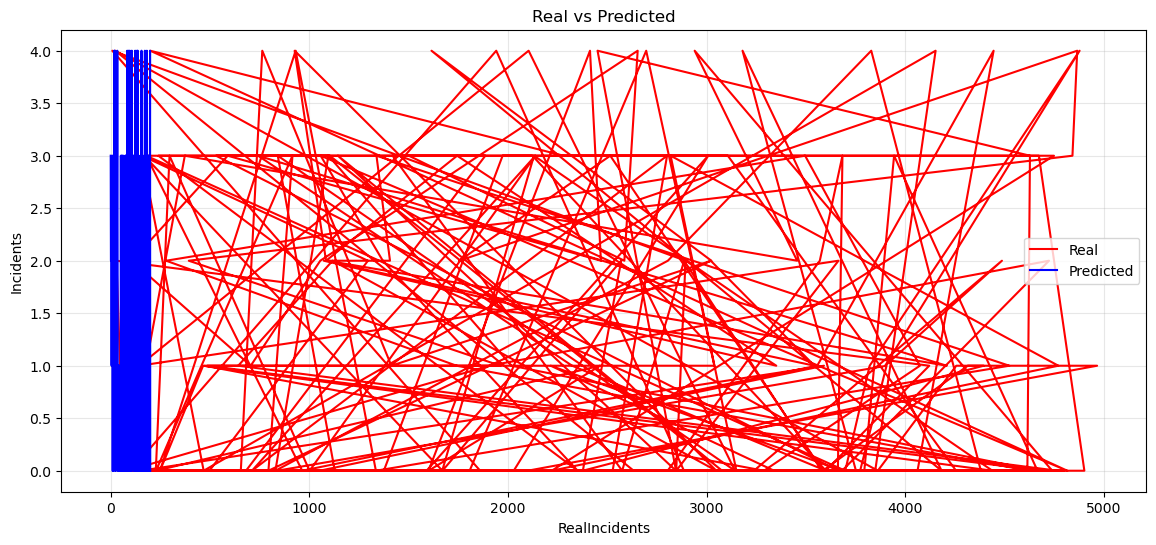

In [206]:
def real_predicted_viz(limit):
    plt.figure(figsize=(14, 6))
    plt.plot(Y_test[:limit], label='Real', color='red')
    plt.plot(predictions[:limit], label='Predicted', color='blue')
    plt.grid(alpha=0.3)
    plt.xlabel('RealIncidents')
    plt.ylabel('Incidents')
    plt.title('Real vs Predicted')
    plt.legend()
    plt.show()
    
real_predicted_viz(200)

#### Classification Report

In [207]:
classification_report(Y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.96      0.97      0.97       517\n           1       0.68      0.72      0.70       189\n           2       0.73      0.69      0.71       144\n           3       0.79      0.73      0.76       265\n           4       0.68      0.72      0.70       135\n\n    accuracy                           0.82      1250\n   macro avg       0.77      0.77      0.77      1250\nweighted avg       0.82      0.82      0.82      1250\n'

## Escrita no Ficheiro

Para fazer uma submissão é preciso meter o seguinte código em modo codigo e nao raw. Tambem é preciso ir a secção Separação entre dataframe de teste e de treino e fazer toggle do que é código e o que é raw

In [208]:
actual_predictions = model.predict(dftest) # Predictions on the test set
actual_predictions = pd.DataFrame(actual_predictions, columns=['incidents']) # Convert to dataframe 
actual_predictions['incidents'] = actual_predictions['incidents'].apply(lambda x: intToIncidents(x))
actual_predictions.head(10)

,incidents
0,Medium
1,None
2,None
3,Low
4,None
5,Very_High
6,Very_High
7,None
8,High
9,Low
